# Crime Analytics
Task: to analyze crime data from San Francisco and answer the questions below.
* **How do incidents vary by time of day?** - Most crimes occur during evening (from 17 to 19) with anomalous extremum at 12 o'clock.
* **Which incidents are most common in the evening?** - Larceny/Theft by a wide margin
* **During what periods of the day are robberies most common?** - Night (from 22 to 2) with anomalous extremum at 12 o'clock.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv'
df = pd.read_csv(url, index_col=0)

In [3]:
df.head(5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
IncidntNum,,,,,,,,,,,,
140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [4]:
df['Hour'] = [time.strptime(x, '%H:%M').tm_hour for x in df['Time']]

In [5]:
def plot_data(df, name):
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.histplot(data=df['Hour'], bins=24, discrete=True, kde=True)
    ax.set(xlim=(0, 24), xticks=np.arange(0, 24))
    ax.set_title('Incidents by hour of day. '+name)
    ax.set_xlabel('Hour of day')
    plt.grid(axis='x', color='0.95')

    groupped = df.groupby('Hour')
    x = list(groupped.groups.keys())
    y = [len(gr) for gr in groupped.groups.values()]
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))
    x_rad = [np.pi * hour / 12.0 for hour in x]
    width = np.pi / 12
    ax.set_title('Incidents by hour of day. ' + name)
    ax.bar(x_rad, y, width=width, alpha=0.8)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    plt.show()

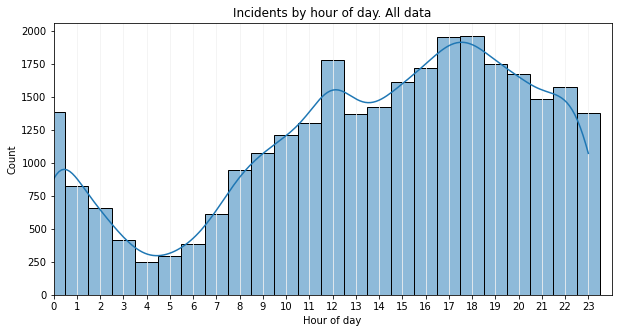

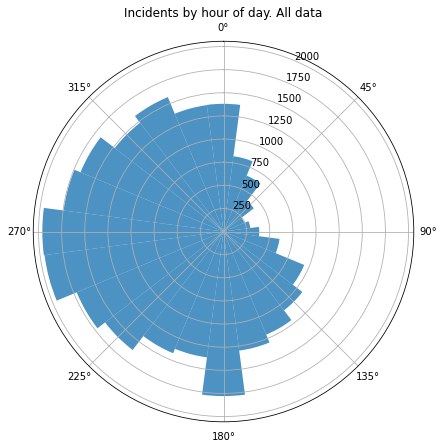

In [6]:
plot_data(df, 'All data')

From figures above we see that most crimes occur during evening (from 17 to 19) with anomalous extremum at 12 o'clock. 

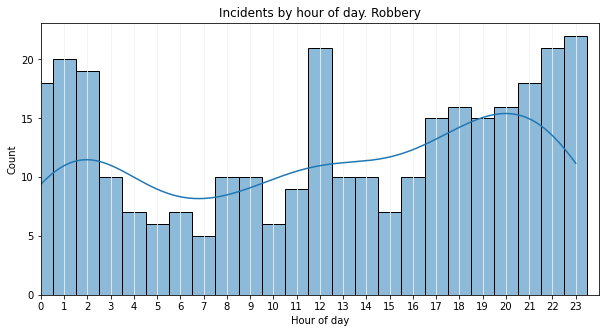

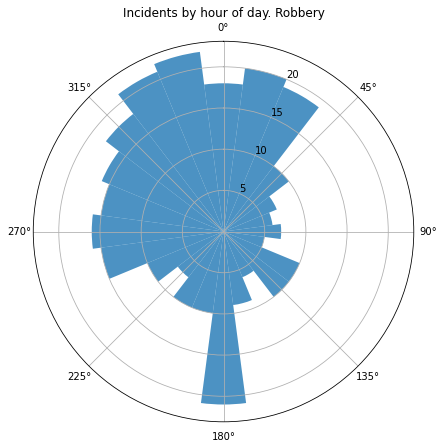

In [7]:
plot_data(df[df['Category']=='ROBBERY'], 'Robbery')

From figures above we see that robberies most common at night (from 22 to 2) with anomalous extremum at 12 o'clock.

<AxesSubplot:ylabel='Category'>

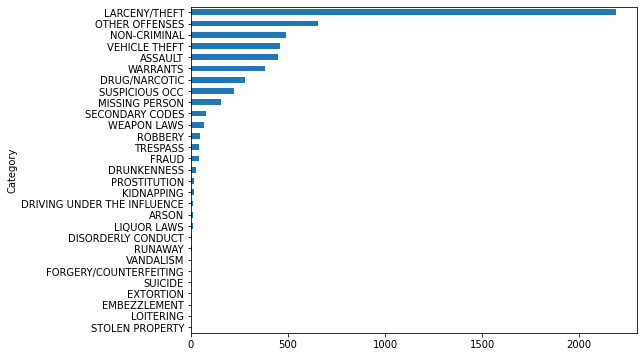

In [8]:
df_evening = df[(df['Hour'] >= 17) & (df['Hour'] <= 19)]

fig, ax = plt.subplots(figsize=(8,6))
df_evening_sorted = df_evening.groupby('Category')['Hour'].count().sort_values()
df_evening_sorted.plot(kind='barh')

From 17 to 19 o'clock most common Larceny/Theft by a wide margin from other categories.